# Task-2 Prediction Using Unsupervised ML
Task: From given "iris" dataset, predict the optimum number of clusters and represent it visually.

For task 2, we have one of the most famous dataset iris.  

Let me give you brief introduction of iris data.

The data set contains 3 classes with 50 instaces each, 150 instances in total, where each class refers to a type of iris plant.

Class: Setosa, Versicolour, Virginica

The format of data is sepal length, sepal width, petal length, petal width



For predicting optimum number of clusters, I use k-Means clustering. K-Means clustering is an unsupervised machine learning technique.


Let's get start with our task!

In [1]:
#import the librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#load the require iris dataset
iris=datasets.load_iris()
irisdata=pd.DataFrame(iris.data,columns=iris.feature_names)
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.  


In [3]:
#slice the important features
x=irisdata.iloc[:,:].values #values gives array
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Now we are using the Elbow method to find the optimal K value.

In the elbow method, we are actually varying the number of clusters from 1 to 10. For each value of k, we are calculating WCSS (Within- Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the k value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decreases.

In [4]:
from sklearn.cluster import KMeans
WCSS=[] 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Inertia measures how well a dataset was clustered by K-Means. It is calulated by measuring the distance between each data point and it's centroid, squaring this distance and summing these square across one cluster.

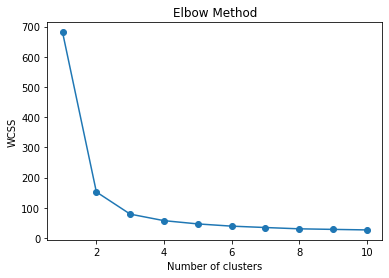

In [5]:
#let's plot the results on line graph, and observe the elbow.
plt.plot(range(1,11),WCSS,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

We can see that the "elbow" on the graph above (where the inertia becomes more linear) is at K=3. We can then fit our K-mean algorithm one more time and plot the different clusters assignd to the data:

In [6]:
#Apply k-mean cluster to the iris dataset.
kmeans=KMeans(n_clusters=3,init="k-means++",
              n_init=10,max_iter=300,random_state=42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


y_kmeans give us different clusters corresponding to X.

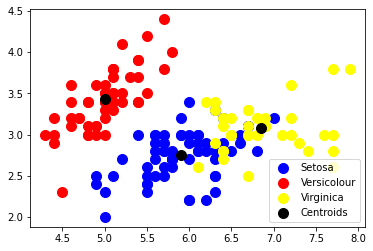

In [7]:
#Let's Visualise the clustes.
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="blue",label="Setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="red",label="Versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="yellow",label="Virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c="black",label="Centroids")
plt.legend()
plt.show()

As you can see there are 3 clusters in total which visualized in different colors and the centroid of each cluster is visualized in black color.

# Cluster Evaluation:

Let's evaluate the performance of our clusters. For that I used Silhouette score method. 

Silhouette score is used to evaluate the quality of clusters using clustering algorithms such as K-means in terms of how well samples are clusterd with other samples that are similar to each other.

In [12]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_kmeans,metric="euclidean")
print("For 3 clusters, Silhouette score is ",score)

For 3 clusters, Silhouette score is  0.5528190123564091


As we know Silhouette score vary -1 to 1. When score is 1 that means, the clusters are very dense and nicely separated. So we can say that our clusters are also nicely separated. 

# Thank You!